In [1]:
import numpy as np
from tensorflow import keras
print(keras.__version__)

2.8.0


In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train) , (x_test , y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
x_train_final = x_train.reshape((-1,784)) 
x_train_final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
x_test_final = x_test.reshape((-1,784))

In [6]:
# normlize the data
x_train_final = x_train_final/255
x_test_final  = x_test_final/255

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(512,input_shape=(784,), activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=30,
  batch_size= 32,
  validation_data=(x_test_final,y_test)
)


Epoch 1/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6820 - accuracy: 0.7792 - val_loss: 0.5343 - val_accuracy: 0.8128
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8359 - val_loss: 0.4875 - val_accuracy: 0.8284
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4284 - accuracy: 0.8504 - val_loss: 0.4446 - val_accuracy: 0.8445
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4018 - accuracy: 0.8590 - val_loss: 0.4203 - val_accuracy: 0.8520
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3818 - accuracy: 0.8661 - val_loss: 0.4013 - val_accuracy: 0.8581
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8717 - val_loss: 0.3908 - val_accuracy: 0.8613
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3512 - accuracy: 0.8753 - val_loss: 0.3859 - val_accuracy

Text(0, 0.5, 'losses')

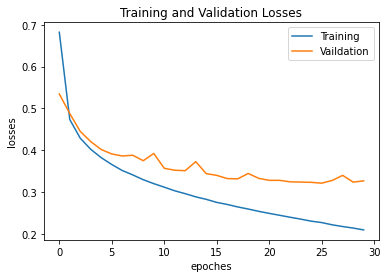

In [11]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

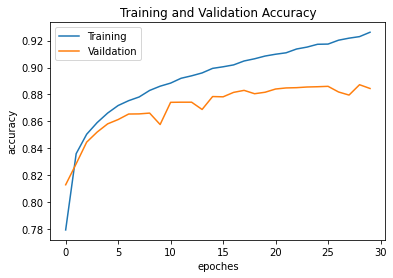

In [12]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')